# 1- Imports

In [1]:
### Essenciais
import pandas as pd
import numpy  as np

### Plot gráfico
from   matplotlib.gridspec import GridSpec
import matplotlib.pyplot   as plt
import seaborn             as  sns

### Proprietária
from RSLib.cb_lib import transform_data as td

# 2- Funções auxiliares | Definições

# 3- Carga dos dados

In [2]:
data_raw = pd.read_csv( '../data/credit_clustering.csv' )

# 4- Análise superficial dos dados

### Tratando valores nulos

In [4]:
data_raw.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
BALANCE,313.0,555.441321,1292.687887,0.0,0.187069,16.848358,286.686616,9164.724752
BALANCE_FREQUENCY,313.0,0.389403,0.408341,0.0,0.090909,0.181818,1.000000,1.000000
PURCHASES,313.0,393.087284,757.905701,0.0,1.400000,130.400000,399.950000,7597.090000
ONEOFF_PURCHASES,313.0,250.433387,624.453991,0.0,0.000000,0.000000,176.030000,6761.290000
INSTALLMENTS_PURCHASES,313.0,142.653898,311.289043,0.0,0.000000,0.000000,152.280000,2959.240000
CASH_ADVANCE,313.0,559.136698,1185.132567,0.0,0.000000,0.000000,480.104401,7616.064965
PURCHASES_FREQUENCY,313.0,0.336043,0.372517,0.0,0.083333,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,313.0,0.107886,0.227370,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,313.0,0.244670,0.359756,0.0,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,313.0,0.067169,0.130087,0.0,0.000000,0.000000,0.083333,1.000000


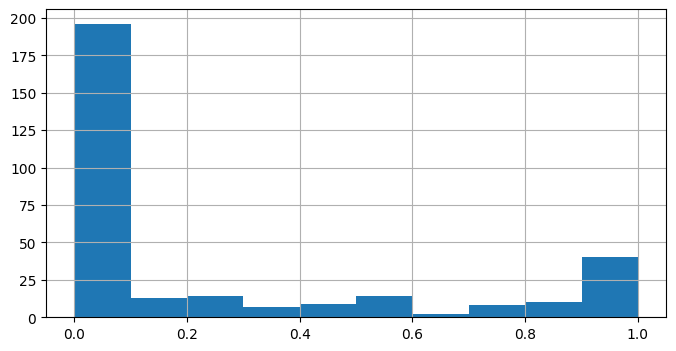

In [5]:
display( data_raw[data_raw.MINIMUM_PAYMENTS.isna()].describe().T )
data_raw[data_raw.MINIMUM_PAYMENTS.isna()].PURCHASES_INSTALLMENTS_FREQUENCY.hist( figsize = (8,4));

    Em primeiro ciclo, os valores nulos de MINIMUM_PAYMENTS, serão trocados por ONEOFF_PURCHASES. Partindo do pressuposto que os valores mínimos de pagamento nulo, são devido às compras pagas de uma só vez.
    Em segundo ciclo, será melhor analisado o que fazer com os valores faltantes (313).

In [3]:
data_raw.MINIMUM_PAYMENTS.fillna( data_raw.ONEOFF_PURCHASES, inplace = True )
data_raw.CREDIT_LIMIT.fillna( 0, inplace = True )

In [5]:
data_raw.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Disposição geral dos dados

'Base contendo 8950 linhas e 18 colunas.'

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


-----------


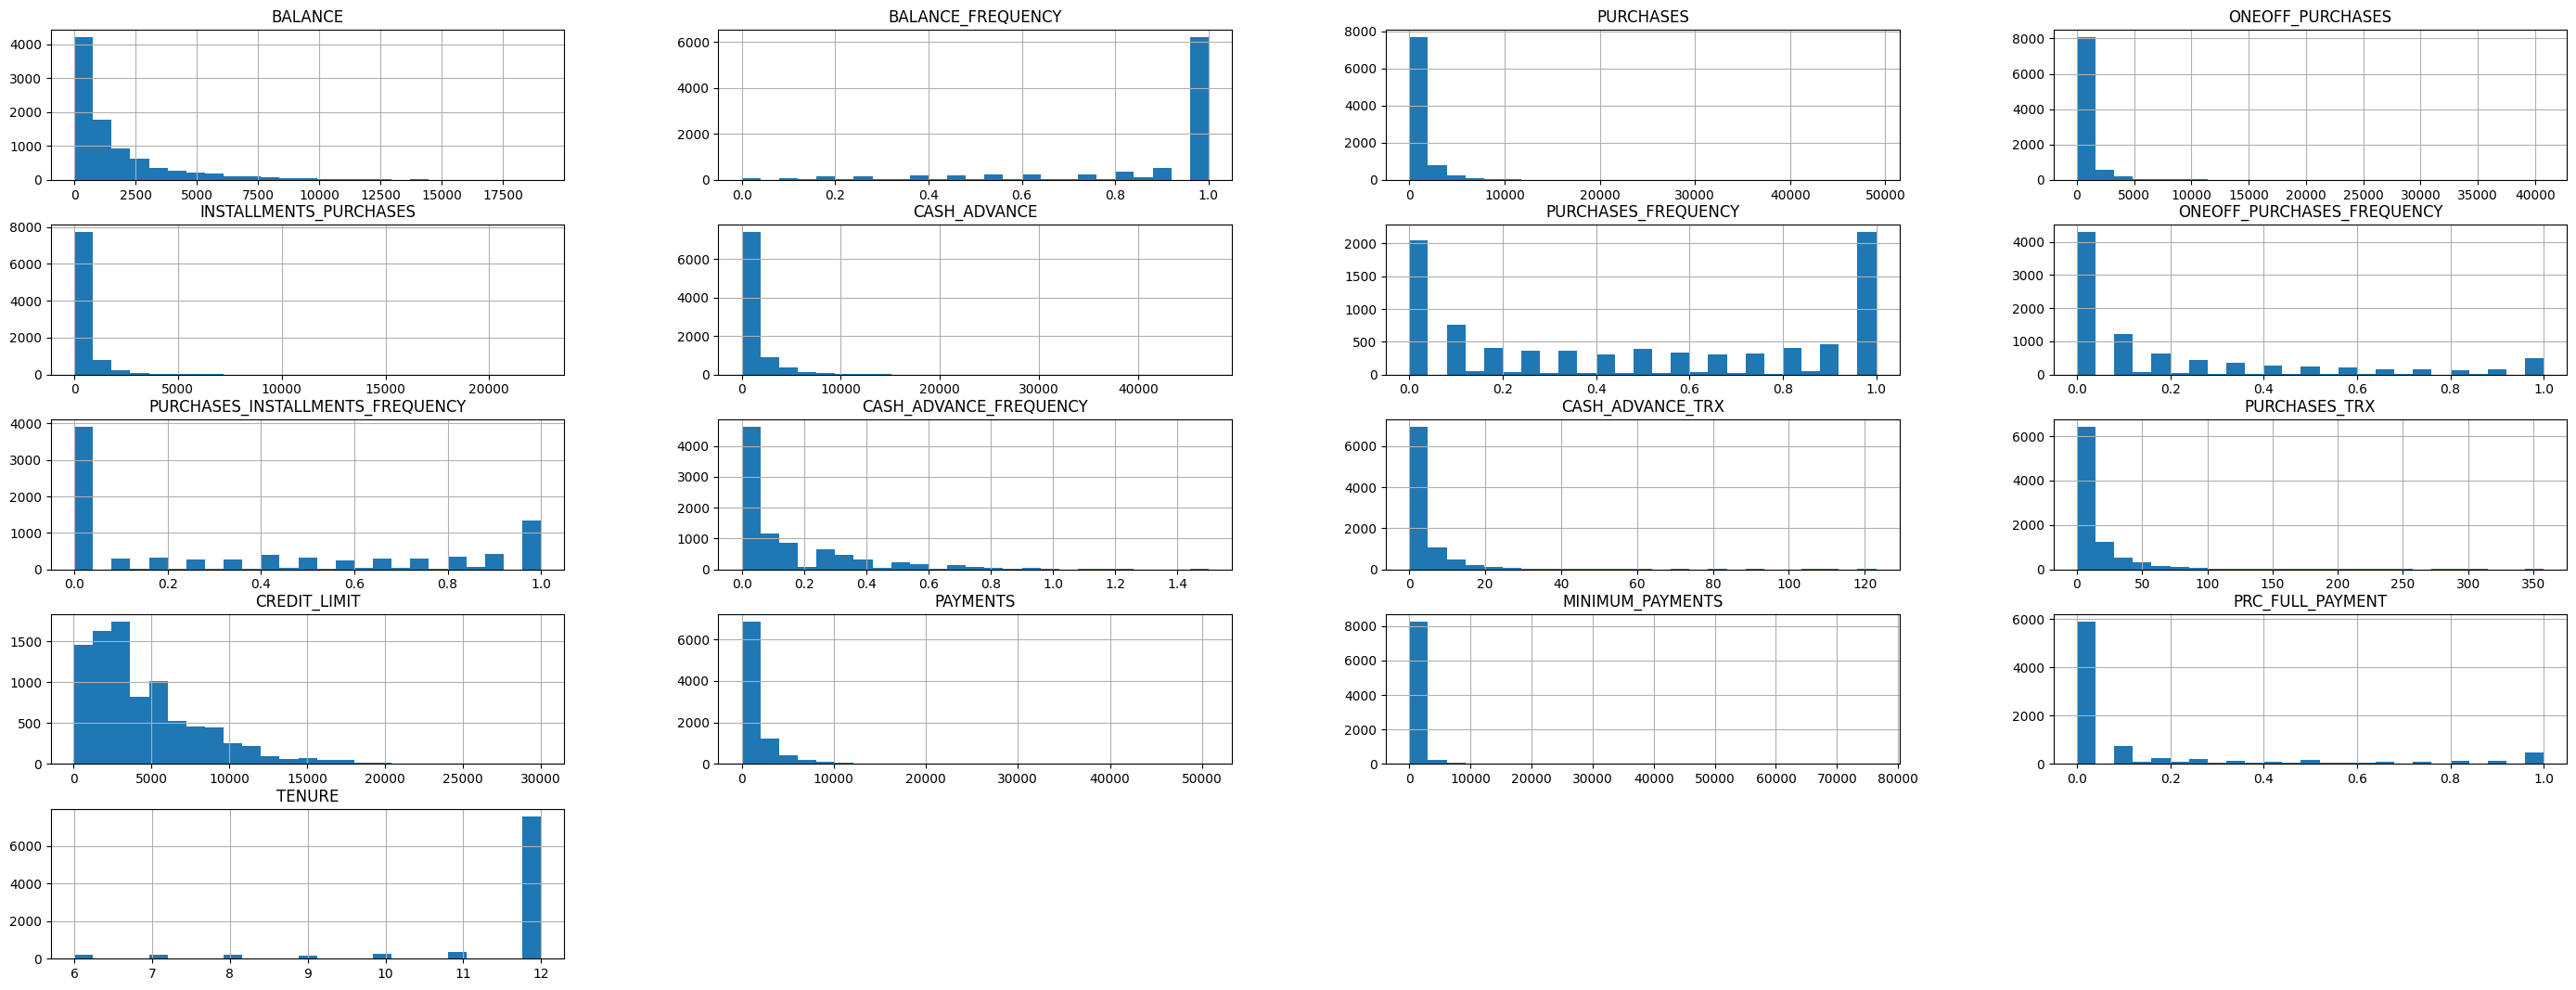

In [11]:
display( f'Base contendo {data_raw.shape[0]} linhas e {data_raw.shape[1]} colunas.' )
display( data_raw.head(3) )
print( '-----------' )
data_raw.hist(figsize = (35,13), bins = 25);


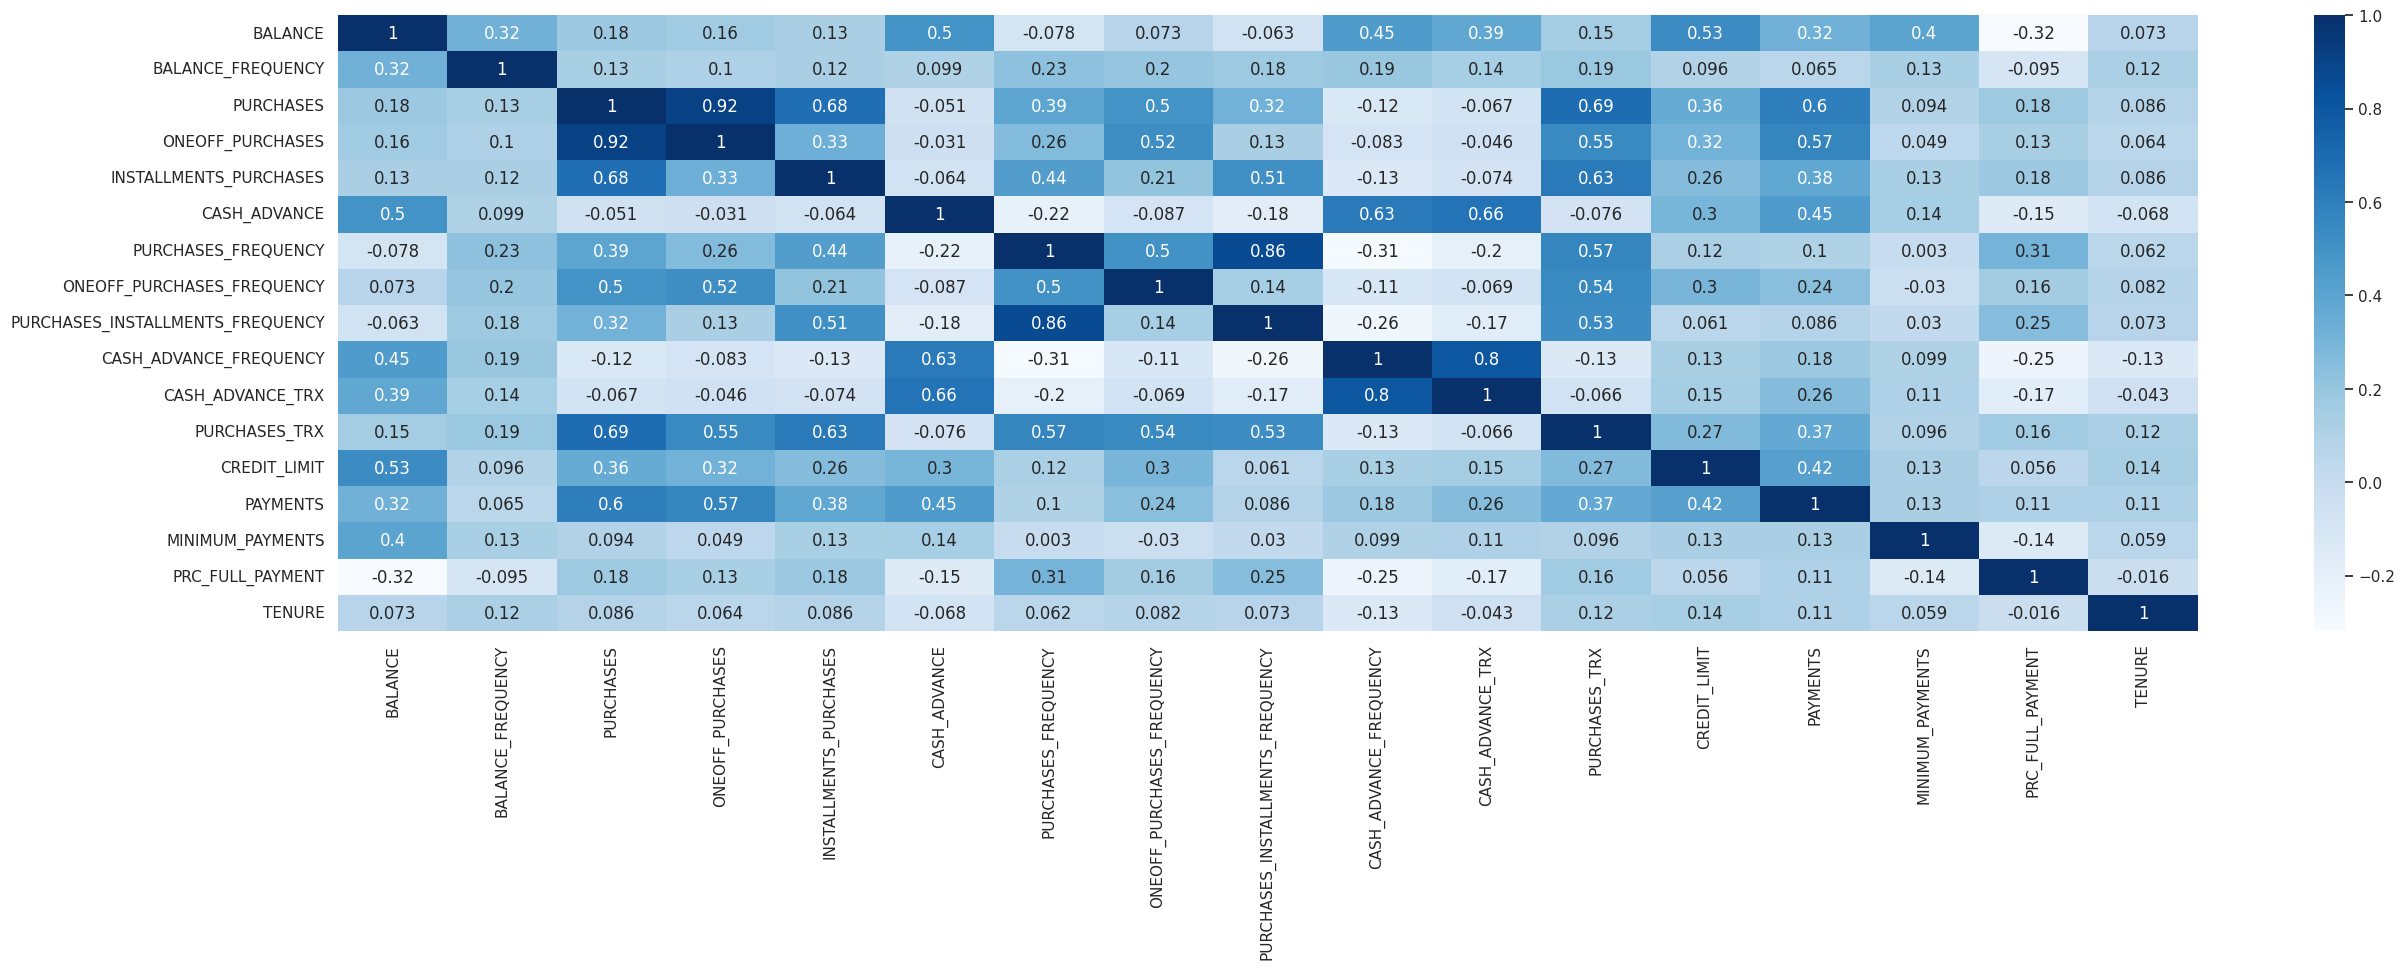

In [27]:
sns.set( rc = {'figure.figsize' : (30,8)} )
ax = sns.heatmap(
    data  = data_raw.corr( method = 'pearson', numeric_only = True ),
    annot = True,
    cmap  = 'Blues'
);

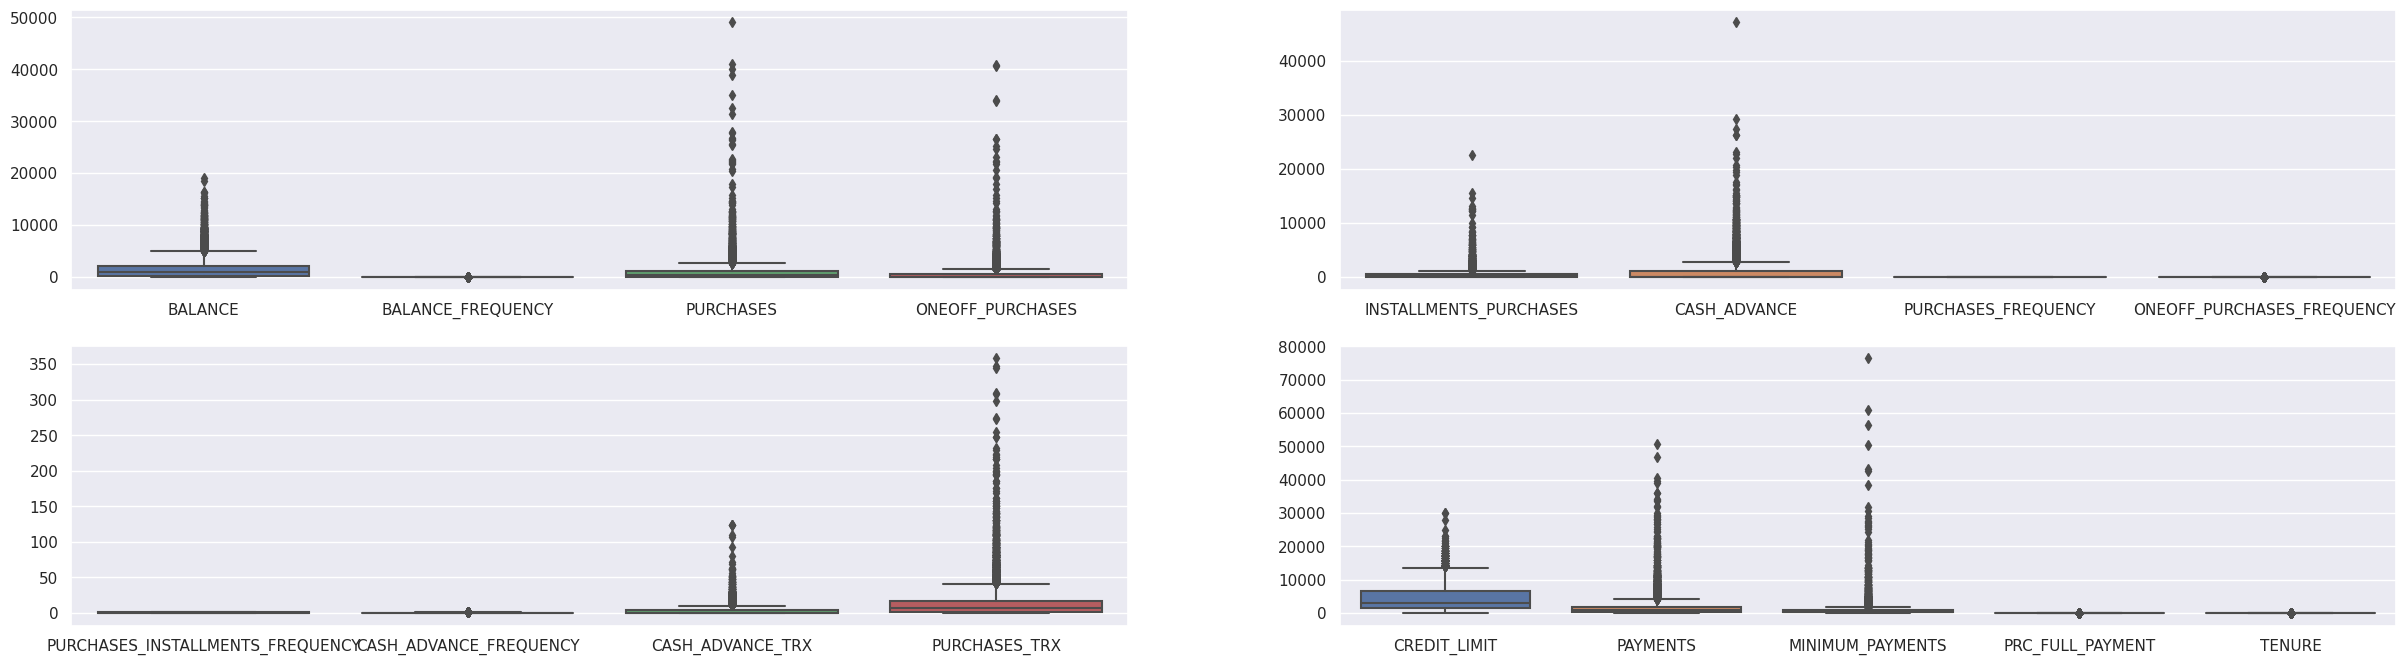

In [109]:
spec = GridSpec(2,2)

# Primeiro gráfico
plt.subplot( spec[0,0] )
sns.boxplot(
    data = data_raw.iloc[:,:5],
);

# Segundo gráfico
plt.subplot( spec[0,1] )
sns.boxplot(
    data = data_raw.iloc[:,5:9],
);

# Terceiro gráfico
plt.subplot( spec[1,0] )
sns.boxplot(
    data = data_raw.iloc[:,9:13],
);

# Quarto gráfico
plt.subplot( spec[1,1] )
sns.boxplot(
    data = data_raw.iloc[:,13:],
);

# 5- Preparação dos dados

### Normalização

In [9]:
data_n = td.normalizacao( data = data_raw )

/home/luan/Documents/DS/01-Estudos/01-Cursos/01-Comunidade_DS/001-PAs/PA006_BankMarketingStrategy/cluster_bank_venv/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BALANCE_FREQUENCY
- CUST_ID
- ONEOFF_PURCHASES_FREQUENCY
- PRC_FULL_PAYMENT
- PURCHASES_FREQUENCY
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'C10001'